# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import plotnine as gg
gg.theme_set(gg.theme_classic)
# import scipy
# import seaborn as sns
# import statsmodels.formula.api as smf  # https://www.statsmodels.org/stable/mixed_linear.html

In [2]:
from Functions import bool_from_index, name_from_index, zscore
from Functions import get_ages_cols, get_category_cols, get_param_names

In [3]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn import linear_model
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Ridge
# from sklearn.metrics import r2_score
# from sklearn.cross_decomposition import PLSRegression
# from sklearn import preprocessing
# from sklearn.cross_decomposition import PLSRegression
# from sklearn.decomposition import PCA, KernelPCA
# from sklearn.manifold import TSNE, Isomap

## Directories etc.

In [4]:
data_path = "C:/Users/maria/MEGAsync/SLCNdata/Meta"
# plot_save_path = "C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots"
# if not os.path.exists(plot_save_path):
#     os.makedirs(plot_save_path)

In [8]:
param_names = get_param_names()
ages_cols = get_ages_cols()
all_data_cols = pd.read_csv(os.path.join(data_path, "all_data.csv"), index_col=0).columns

In [28]:
wanted_cols = [
    
    # Participant info
    'ID', 'PreciseYrs', 'BMI', 'Gender', 'meanT', 'PDS', 'age_group',
    
    # Basic performance
    'bf_ACC', 'bf_RT', 'bf_RTsd', 'bf_ACC_delta', 'bf_RT_delta', 'bf_miss',
    'rl_ACC', 'rl_RT', 'rl_RTsd', 'rl_ACC_delta', 'rl_RT_delta', 'rl_miss',
    'ps_ACC', 'ps_RT', 'ps_RTsd', 'ps_ACC_delta', 'ps_RT_delta', 'ps_miss',

    # WSLS & stay
    'bf_WS', 'bf_LS', 'bf_stay_choice', 'bf_stay_motor',
    'rl_WS', 'rl_LS', 'rl_stay_choice', 'rl_stay_motor',
    'ps_WS', 'ps_LS', 'ps_stay', 

    # Parameters
    'bf_alpha', 'bf_nalpha', 'bf_1_over_beta', 'bf_forget',
    'rl_alpha', 'rl_persev', 'rl_forget', 'rl_wm', 'rl_epsilon', 'rl_K',
    'ps_alpha', 'ps_nalpha', 'ps_1_over_beta_RL', 'ps_persev_RL', 'ps_1_over_beta_BF', 'ps_persev_BF', 'ps_p_switch', 'ps_p_reward',
    
    # Additional measures
    'rl_ACC_ns2_minus_ns5', 'rl_ACC_ns2_minus_ns5_delta', 'rl_RT_ns5_minus_ns2', 'rl_nsslope',
    'rl_lrn-ns_sig', 'rl_lrn-delay_sig', 'rl_lrn-pcor_sig', 'rl_lrn-pinc_sig',
    'ps_n_switches', 'ps_WLS', 'ps_LWS', 'ps_criterion_trial',
#     'bf_exponential',
]

wsls_cols = [col for col in all_data_cols if ('WS' in col) or ('LS' in col)]

choice_param_cols = []
update_param_cols = []
for col in all_data_cols:
    if ('beta' in col) or ('epsilon' in col) or ('forget' in col):
        choice_param_cols += [col]
    if 'alpha' in col:
        update_param_cols += [col]

# Format all_data

## Read in all_data and selected wanted columns

In [11]:
all_data = pd.read_csv(os.path.join(data_path, "all_data.csv"), index_col=0)
all_data = all_data[wanted_cols]
all_data

,ID,bf_ACC,bf_ACC_early,bf_ACC_mid,bf_ACC_late,bf_RT,bf_RT_early,bf_RT_mid,bf_RT_late,bf_RTsd,...,age_group,bf_ACC_delta,bf_RT_delta,bf_WS_plus_LS,rl_ACC_delta,rl_RT_delta,rl_WS_plus_LS,ps_ACC_delta,ps_RT_delta,ps_WS_plus_LS
0,17,0.56667,0.650,0.725,0.325,1.33950,1.27260,1.33780,1.47720,0.69630,...,0.25,-0.325,-0.20460,1.18944,0.35000,0.82780,1.73865,-0.07500,0.093537,0.785714
1,18,0.80000,0.575,0.875,0.950,1.19270,1.13960,1.22100,1.19880,0.53170,...,0.50,0.375,-0.05920,1.16194,0.30000,0.21165,1.81217,0.05000,0.031057,0.729032
2,19,0.50000,0.500,0.500,0.500,0.83342,0.83970,0.82300,0.83755,0.20657,...,0.50,0.000,0.00215,1.00000,0.46667,0.14508,1.82338,-0.02500,0.077876,0.722581
3,20,0.85000,0.675,0.900,0.975,0.99265,1.16290,1.02430,0.84556,0.52117,...,0.75,0.300,0.31734,1.30918,0.26667,0.19444,1.85598,-0.02500,-0.029955,0.741935
4,22,0.73333,0.600,0.825,0.775,1.51800,1.56260,1.42940,1.57780,1.03220,...,1.00,0.175,-0.01520,1.52510,0.31666,0.21055,1.79059,0.12500,-0.062303,0.716129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,465,0.74167,0.575,0.800,0.850,1.11640,1.37600,1.06800,0.98635,0.52359,...,2.00,0.275,0.38965,1.44983,0.46667,0.19741,1.88872,0.00000,-0.039679,0.761538
252,466,0.60833,0.550,0.700,0.575,0.87618,0.88236,0.97296,0.75243,0.32142,...,2.00,0.025,0.12993,1.11373,0.23333,0.16111,1.92859,0.05000,0.020202,0.807692
253,467,0.80000,0.825,0.800,0.775,1.29200,1.58270,1.08610,1.19510,0.83115,...,2.00,-0.050,0.38760,1.42970,0.28334,0.12390,1.86259,0.00000,0.161714,0.915385
254,468,0.71667,0.700,0.775,0.675,2.12680,2.32480,2.46370,1.53470,1.53770,...,2.00,-0.025,0.79010,1.58060,0.30000,0.28372,1.91362,-0.08141,0.066859,0.775194


In [12]:
all_data_z = all_data[ages_cols + ['age_group']]
for col in [col for col in all_data.columns if not col in ages_cols + ['age_group']]:
    all_data_z[col] = zscore(all_data[col])
    
all_data_z

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ID,PreciseYrs,BMI,Gender,meanT,PDS,age_group,bf_ACC,bf_ACC_early,bf_ACC_mid,...,ps_1_over_beta_bf,bf_ACC_delta,bf_RT_delta,bf_WS_plus_LS,rl_ACC_delta,rl_RT_delta,rl_WS_plus_LS,ps_ACC_delta,ps_RT_delta,ps_WS_plus_LS
0,17,8.657084,18.200751,2.0,NaN,2.50,0.25,-1.316224,-0.219717,-0.348717,...,1.585357,-2.967827,-1.096424,-0.337602,0.186029,2.724397,-0.427422,-1.156824,0.911645,0.028316
1,18,12.637919,16.157863,2.0,NaN,2.25,0.50,0.243251,-0.732693,0.485665,...,0.039533,1.500825,-0.672216,-0.553128,-0.315075,0.030096,0.202937,0.403761,0.379935,-0.742279
2,19,12.637919,14.316358,1.0,NaN,1.25,0.50,-1.761817,-1.245669,-1.600291,...,-0.353003,-0.893096,-0.493225,-1.822303,1.355305,-0.261001,0.299052,-0.532590,0.778374,-0.829989
3,20,14.543463,17.433768,1.0,120.649667,2.80,0.75,0.577429,-0.048725,0.624729,...,-1.547170,1.022041,0.426350,0.600838,-0.649111,-0.045159,0.578564,-0.532590,-0.139277,-0.566859
4,22,16.490075,22.709959,1.0,147.334443,3.00,1.00,-0.202342,-0.561701,0.207538,...,1.316137,0.224067,-0.543845,2.293071,-0.148107,0.025286,0.017911,1.340113,-0.414564,-0.917699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,465,22.333333,NaN,2.0,NaN,NaN,2.00,-0.146601,-0.732693,0.068474,...,-0.877541,0.862446,0.637317,1.703156,1.355305,-0.032172,0.859276,-0.220473,-0.222028,-0.300356
252,466,20.083333,NaN,1.0,NaN,NaN,2.00,-1.037787,-0.903685,-0.487781,...,-1.176037,-0.733501,-0.120424,-0.930965,-0.983247,-0.190905,1.201121,0.403761,0.287561,0.327108
253,467,18.750000,NaN,2.0,NaN,NaN,2.00,0.243251,0.977226,0.068474,...,-0.601950,-1.212285,0.631336,1.545391,-0.482043,-0.353617,0.635238,-0.220473,1.491841,1.791190
254,468,21.833333,NaN,2.0,NaN,NaN,2.00,-0.313690,0.122267,-0.070590,...,-0.642973,-1.052690,1.805641,2.728042,-0.315075,0.345244,1.072768,-1.236854,0.684614,-0.114711


In [13]:
def wsls_row_bool(feature):
    
    if ('WS' in feature) or ('LS' in feature):
        return True
    else:
        return False

# # Example use
# all_data_long.loc[all_data_long.feature.apply(wsls_row_bool), 'category'] = 'WSLS'
# all_data_long

In [22]:
def get_category_from_feature(data):
    
    category_cols = get_category_cols()
    category = data['feature'].apply(name_from_index, names=param_names + category_cols)
    category[category == 'p_switch_emp'] = 'ACC'
    category[category == 'p_reward'] = 'alpha'
    category[data.feature.apply(wsls_row_bool)] = 'WSLS'
#     data['category'] = data['feature'].apply(name_from_index, names=param_names + category_cols)
#     data.loc[data.category == 'p_switch_emp', 'category'] = 'ACC'
#     data.loc[data.category == 'p_reward', 'category'] = 'alpha'
#     data.loc[data.feature.apply(wsls_row_bool), 'category'] = 'WSLS'

    return category

# Example use
get_category_from_feature(all_data_long)

0         ACC
1         ACC
2         ACC
3         ACC
4         ACC
         ... 
29691    WSLS
29692    WSLS
29693    WSLS
29694    WSLS
29695    WSLS
Name: feature, Length: 29696, dtype: object

In [24]:
# Melt all_data
all_data_long = all_data.melt(id_vars=ages_cols+['age_group'], var_name='feature')

# Add columns
all_data_long['category'] = get_category_from_feature(all_data_long)
all_data_long['task'] = all_data_long.feature.apply(lambda x : x[:2])
all_data_long['param'] = all_data_long.feature.apply(lambda x : x[3:])
all_data_long

,ID,PreciseYrs,BMI,Gender,meanT,PDS,age_group,feature,value,category,task,param
0,17,8.657084,18.200751,2.0,NaN,2.50,0.25,bf_ACC,0.566670,ACC,bf,ACC
1,18,12.637919,16.157863,2.0,NaN,2.25,0.50,bf_ACC,0.800000,ACC,bf,ACC
2,19,12.637919,14.316358,1.0,NaN,1.25,0.50,bf_ACC,0.500000,ACC,bf,ACC
3,20,14.543463,17.433768,1.0,120.649667,2.80,0.75,bf_ACC,0.850000,ACC,bf,ACC
4,22,16.490075,22.709959,1.0,147.334443,3.00,1.00,bf_ACC,0.733330,ACC,bf,ACC
...,...,...,...,...,...,...,...,...,...,...,...,...
29691,465,22.333333,NaN,2.0,NaN,NaN,2.00,ps_WS_plus_LS,0.761538,WSLS,ps,WS_plus_LS
29692,466,20.083333,NaN,1.0,NaN,NaN,2.00,ps_WS_plus_LS,0.807692,WSLS,ps,WS_plus_LS
29693,467,18.750000,NaN,2.0,NaN,NaN,2.00,ps_WS_plus_LS,0.915385,WSLS,ps,WS_plus_LS
29694,468,21.833333,NaN,2.0,NaN,NaN,2.00,ps_WS_plus_LS,0.775194,WSLS,ps,WS_plus_LS


In [25]:
# Melt all_data_z
all_data_long_z = all_data_z.melt(id_vars=ages_cols+['age_group'], var_name='feature')

# Add columns
all_data_long_z['category'] = get_category_from_feature(all_data_long_z)
all_data_long_z['task'] = all_data_long_z.feature.apply(lambda x : x[:2])
all_data_long_z['param'] = all_data_long_z.feature.apply(lambda x : x[3:])
all_data_long_z

,ID,PreciseYrs,BMI,Gender,meanT,PDS,age_group,feature,value,category,task,param
0,17,8.657084,18.200751,2.0,NaN,2.50,0.25,bf_ACC,-1.316224,ACC,bf,ACC
1,18,12.637919,16.157863,2.0,NaN,2.25,0.50,bf_ACC,0.243251,ACC,bf,ACC
2,19,12.637919,14.316358,1.0,NaN,1.25,0.50,bf_ACC,-1.761817,ACC,bf,ACC
3,20,14.543463,17.433768,1.0,120.649667,2.80,0.75,bf_ACC,0.577429,ACC,bf,ACC
4,22,16.490075,22.709959,1.0,147.334443,3.00,1.00,bf_ACC,-0.202342,ACC,bf,ACC
...,...,...,...,...,...,...,...,...,...,...,...,...
29691,465,22.333333,NaN,2.0,NaN,NaN,2.00,ps_WS_plus_LS,-0.300356,WSLS,ps,WS_plus_LS
29692,466,20.083333,NaN,1.0,NaN,NaN,2.00,ps_WS_plus_LS,0.327108,WSLS,ps,WS_plus_LS
29693,467,18.750000,NaN,2.0,NaN,NaN,2.00,ps_WS_plus_LS,1.791190,WSLS,ps,WS_plus_LS
29694,468,21.833333,NaN,2.0,NaN,NaN,2.00,ps_WS_plus_LS,-0.114711,WSLS,ps,WS_plus_LS


# Check that everything looks good

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


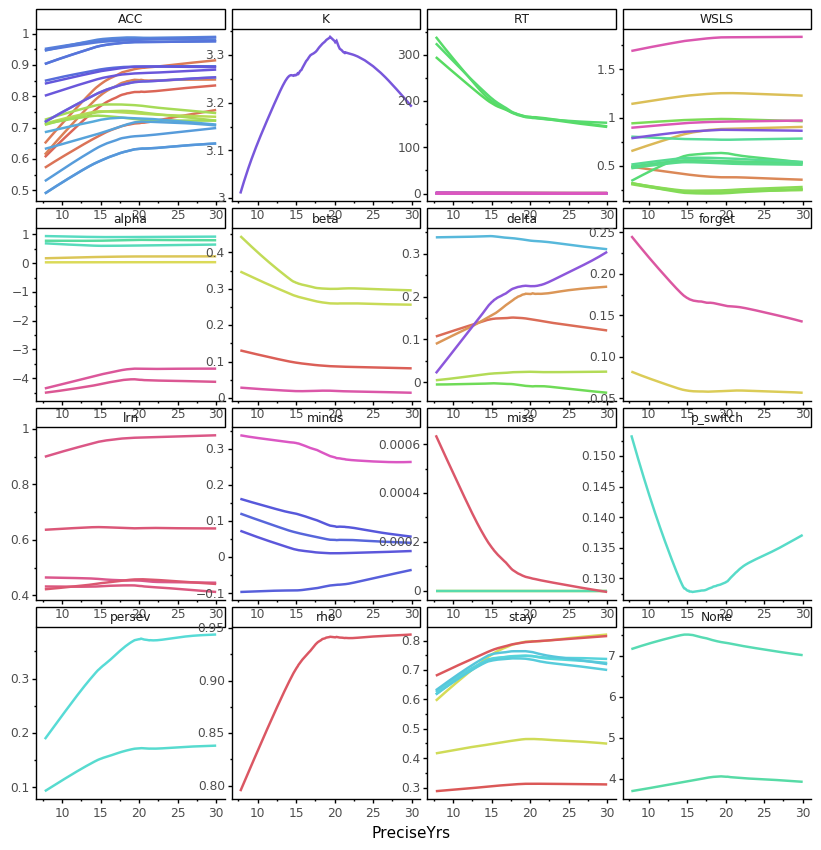

<ggplot: (-9223371889658476491)>


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


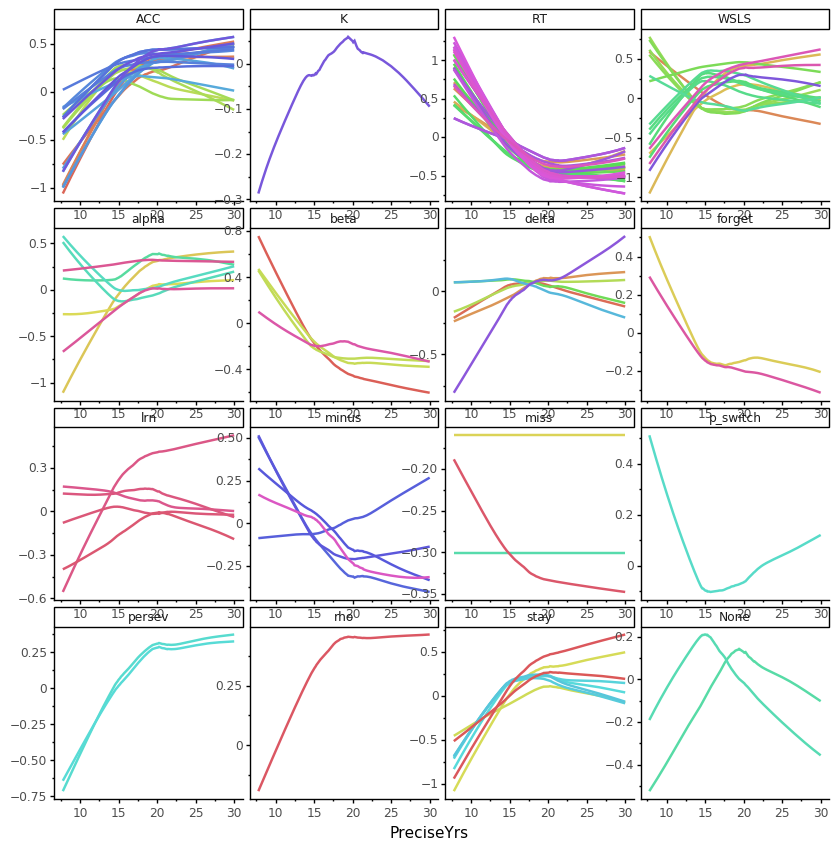

<ggplot: (-9223371889658476491)>


In [27]:
# Group features
gg.options.figure_size = (10, 10)
g = (gg.ggplot(
    all_data_long,#[all_data_long.category == 'lrn'],
    gg.aes('PreciseYrs', 'value', color='feature'))
#  + gg.geom_point(size=0.5, alpha=0.5)
 + gg.theme(legend_position='none')
 + gg.labs(y='', color='')
 + gg.geom_smooth()
 + gg.facet_wrap('~ category', scales='free')
)
print(g)

g_z = g
g_z.data = all_data_long_z

print(g_z)

# Descriptives

## Sample age distribution

In [ ]:
gg.options.figure_size = (5, 3)
g = (gg.ggplot(all_data, gg.aes('age_group', fill='factor(age_group)'))
#  + gg.geom_histogram(bin=0.25)
 + gg.stat_bin(binwidth=0.25)
 + gg.facet_grid('~ Gender')
 + gg.scale_fill_brewer()
)
g.save(os.path.join(plot_save_path, '0AgegroupHistogram.png'))
g

## Distributions of all features

In [ ]:
# Histograms and 
# for feature in all_data.columns:
#     g = (gg.ggplot(all_data, gg.aes(feature))
#          + gg.geom_histogram()
#         )
#     g.save(os.path.join(plot_save_path, '0hist_{}.png'.format(feature)))
    
#     g = (gg.ggplot(all_data, gg.aes('PreciseYrs', feature))
#          + gg.geom_point()
#          + gg.geom_smooth()
#         )
#     g.save(os.path.join(plot_save_path, '0age_{}.png'.format(feature)))
# g

In [ ]:
# gg.options.figure_size = (20, 20)

# # Pretty, but too slow to work
# g = (gg.ggplot(all_data_long, gg.aes('value'))
#      + gg.geom_histogram()
#      + gg.facet_wrap('~ feature', scales='free')
#     )
# g

# Ugly, but fast and works
# for feature in all_data.columns:
#     g = (gg.ggplot(all_data, gg.aes(feature))
#          + gg.geom_histogram()
#         )
#     g.save(os.path.join(plot_save_path, '0hist_{}.png'.format(feature)))

In [ ]:
# Mean of each feature
gg.options.figure_size = (10, 10)
g = (gg.ggplot(all_data_long, gg.aes('param', 'value'))
     + gg.stat_summary()
#      + gg.geom_violin()
     + gg.labs(x='', y='')
     + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
     + gg.facet_wrap('~ task', scales='free', ncol=1)
    )
g.save(os.path.join(plot_save_path, '0feature_means.png'))
g

## Features over age

In [ ]:
# Each feature over age
gg.options.figure_size = (20, 20)
g = (gg.ggplot(all_data_long, gg.aes('PreciseYrs', 'value', color='factor(Gender)'))
 + gg.geom_point(size=0.5, alpha=0.5)
 + gg.geom_smooth()
 + gg.labs(y='')
 + gg.facet_wrap('~ feature', scales='free')
)
g.save(os.path.join(plot_save_path, '2age_feature_separate.png'))

g_pds = g + gg.aes('PDS')
g_pds.save(os.path.join(plot_save_path, '2PDS_feature_separate.png'))
g_t = g + gg.aes('meanT')
g_t.save(os.path.join(plot_save_path, '2T_feature_separate.png'))

# Each feature over age group
g2 = (gg.ggplot(all_data_long, gg.aes('age_group', 'value', fill='factor(age_group)'))
 + gg.stat_summary(geom='bar')
 + gg.scale_fill_brewer()
 + gg.facet_wrap('~ feature', scales='free')
)
g2.save(os.path.join(plot_save_path, '2agegroup_feature.png'))

g, g2

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\2age_feature.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


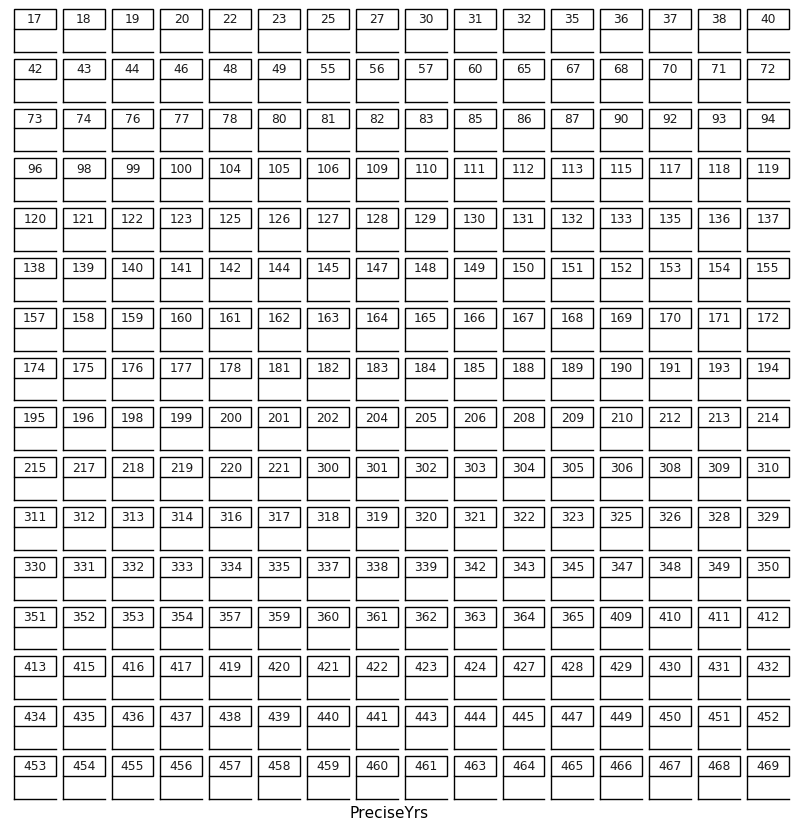

<ggplot: (147194335734)>


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\2age_feature_z.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


KeyboardInterrupt: 

In [17]:
# Group features
gg.options.figure_size = (10, 10)
g = (gg.ggplot(
    all_data_long,#[all_data_long.category == 'lrn'],
    gg.aes('PreciseYrs', 'value', color='feature'))
#  + gg.geom_point(size=0.5, alpha=0.5)
 + gg.labs(y='', color='')
 + gg.geom_smooth()
 + gg.facet_wrap('~ category', scales='free')
)
g.save(os.path.join(plot_save_path, '2age_feature.png'))
print(g)

g_z = g
g_z.data = all_data_long_z
g_z.save(os.path.join(plot_save_path, '2age_feature_z.png'))

print(g_z)

## Correlation between features

In [ ]:
# Compute the correlation matrix
corr = all_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig(os.path.join(plot_save_path, '1CorrMatrixAll.png'))

In [ ]:
# Correlations between ACCs and RTs in different tasks
rt_cols = [col for col in all_data.columns if
           ('RT' in col) and ('sd' not in col) and ('delta' not in col) and ('minus' not in col)]
rtsd_cols = [col for col in all_data.columns if ('RT' in col) and ('sd' in col)]
acc_cols = [col for col in all_data.columns if
            ('ACC' in col) and ('sd' not in col) and ('delta' not in col) and ('minus' not in col)]

# Compute the correlation matrix
dat = all_data[acc_cols + rt_cols + rtsd_cols + ['PreciseYrs']]
# corr = dat.corr()
corr = scipy.stats.spearmanr(dat, nan_policy='omit').correlation
corr = pd.DataFrame(corr, columns=dat.columns, index=dat.columns)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, vmax=1, vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig(os.path.join(plot_save_path, '1CorrMatrixBehavior.png'))

In [ ]:
# Correlations between parameters in different tasks
param_cols_by_task = [
#     'fc_betas_1', 'fc_betas_2', 'fc_betas_3', 'fc_betas_4', 'fc_alpha', 'fc_beta', 'fc_ralpha',
    'bf_alpha', 'bf_nalpha', 'bf_beta', 'bf_forget',
    'rl_K', 'rl_alpha', 'rl_wm', 'rl_forget', 'rl_epsilon', 'rl_persev',
    'ps_beta_BF', 'ps_beta_RL', 'ps_persev_RL', 'ps_persev_BF', 'ps_alpha', 'ps_nalpha', 'ps_p_switch', 'ps_p_reward']

param_cols_by_param = [
    'bf_beta', 'ps_beta_BF', 'ps_beta_RL', 'ps_p_switch',
    'bf_alpha', 'rl_alpha', 'ps_alpha',
    'bf_nalpha', 'ps_nalpha', 'ps_p_reward',
    'rl_persev', 'ps_persev_RL', 'ps_persev_BF',
    'bf_forget', 'rl_forget',
    'rl_epsilon',
    'rl_K', 'rl_wm']

# Compute the correlation matrix
dat = all_data[param_cols_by_param + ['PreciseYrs']]
# dat = all_data[param_cols_by_task + ['PreciseYrs']]
# corr = dat.corr()
corr = scipy.stats.spearmanr(dat, nan_policy='omit').correlation
corr = pd.DataFrame(corr, columns=dat.columns, index=dat.columns)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, vmax=1, vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig(os.path.join(plot_save_path, '1CorrMatrixParams_param.png'))

# Dimensionality reduction (PCA)

In [ ]:
# Run PCA
def run_pca(pca_dat):
    
    pca = PCA(n_components=pca_dat.shape[1])
    # pca = KernelPCA(n_components=z_dat.shape[1])
    fit = pca.fit_transform(pca_dat)
    
    return pca, fit

# Run PCA on all data
ids_all = all_data_z.drop(columns=ages_cols[1:] + ['age_group']).dropna().ID
pca_dat_all = all_data_z.drop(columns=ages_cols + ['age_group']).dropna()
pca_all, fit_all = run_pca(pca_dat_all)

# Run PCA on behavior only
param_cols = []
for col in all_data_z.columns:
    for param_name in param_names:
        if param_name in col:
            param_cols += [col]

ids_beh = all_data_z.drop(columns=ages_cols[1:] + ['age_group'] + param_cols).dropna().ID
pca_dat_beh = all_data_z.drop(columns=ages_cols + ['age_group'] + param_cols).dropna()
pca_beh, fit_beh = run_pca(pca_dat_beh)

# Run PCA on params only
ids_par = all_data_z[param_cols + ['ID']].dropna().ID
pca_dat_par = all_data_z[param_cols].dropna()
pca_par, fit_par = run_pca(pca_dat_par)

In [ ]:
# Plot explained variance
def plot_expl_var(pca_dat, pca, name):
    
    n_comp = 20
    expl_var_dat = pd.DataFrame({'PC': range(pca_dat.shape[1]), 'expl_var': np.cumsum(pca.explained_variance_ratio_)})
    expl_var_at_n_comp = list(expl_var_dat[expl_var_dat.PC <= n_comp].expl_var)[-1]
    print("Explained variance at {} components: {}%.".format(n_comp, round(100 * expl_var_at_n_comp, 1)))

    g = (gg.ggplot(expl_var_dat, gg.aes('PC', 'expl_var'))
     + gg.geom_point()
     + gg.geom_line()
#      + gg.geom_hline(yintercept=1, linetype='dashed')
#      + gg.geom_hline(yintercept=expl_var_at_n_comp, linetype='dotted')
#      + gg.geom_vline(xintercept=n_comp, linetype='dotted')
    )
    g.save(os.path.join(plot_save_path, '5PCAExplVar_{}.png'.format(name)))
    print(g)
    
# Explained variance all behaviors
gg.options.figure_size = (4, 4)
plot_expl_var(pca_dat_all, pca_all, 'all')
plot_expl_var(pca_dat_beh, pca_beh, 'beh')
plot_expl_var(pca_dat_par, pca_par, 'par')

In [ ]:
def create_fit_pd(fit, pca_dat, ids, ages_sub, n_comp=9):
    
    # fit_pd
    fit_pd = pd.DataFrame(fit,
                          columns=['pc{}'.format(i) for i in range(pca_dat.shape[1])],
                          index=ids)
    fit_pd = fit_pd.reset_index()
    fit_pd = fit_pd.merge(ages_sub)
    
    # fit_long
    fit_pd_long = fit_pd.melt(
        value_vars=['pc{}'.format(i) for i in range(n_comp)],
        id_vars=ages_cols)

    return fit_pd, fit_pd_long

# Create fit_pd's
ages_sub = ages[ages_cols]
fit_pd_all, fit_pd_long_all = create_fit_pd(fit_all, pca_dat_all, ids_all, ages_sub)
fit_pd_beh, fit_pd_long_beh = create_fit_pd(fit_beh, pca_dat_beh, ids_beh, ages_sub)
fit_pd_par, fit_pd_long_par = create_fit_pd(fit_par, pca_dat_par, ids_par, ages_sub)

In [ ]:
# Age in PC space
def plot_age_in_pc_space(fit_pd, name):
    
    g1 = (gg.ggplot(fit_pd, gg.aes('pc0', 'pc1', color='PreciseYrs'))
     + gg.geom_point(size=0.5)
    )
    g1.save(os.path.join(plot_save_path, '5PC0PC1_Age_{}.png'.format(name)))

    g2 = g1 + gg.aes('pc2', 'pc3')
    g2.save(os.path.join(plot_save_path, '5PC2PC3_Age_{}.png'.format(name)))
    
    g3 = g1 + gg.aes(color='PDS')
    g3.save(os.path.join(plot_save_path, '5PC0PC1_PDS_{}.png'.format(name)))

    g4 = g1 + gg.aes(color='meanT')
    g4.save(os.path.join(plot_save_path, '5PC0PC1_T_{}.png'.format(name)))
    
    print(g1)

# Run on all measures
plot_age_in_pc_space(fit_pd_all, 'all')
plot_age_in_pc_space(fit_pd_beh, 'beh')
plot_age_in_pc_space(fit_pd_par, 'par')

In [ ]:
# PC changes over age
def plot_pcs_over_age(fit_pd_long, name):
    
    gg.options.figure_size = (10, 8)
    g = (gg.ggplot(fit_pd_long, gg.aes('PreciseYrs', 'value', color='factor(Gender)'))
     + gg.geom_point(alpha=0.5, size=0.5)
     + gg.geom_smooth()
     + gg.facet_wrap('~ variable', scales='free')
    )
    g.save(os.path.join(plot_save_path, '5PCA_Age_{}.png'.format(name)))
    print(g)
    
    g_t = g + gg.aes(x='meanT')
    g_t.save(os.path.join(plot_save_path, '5PCA_T_{}.png'.format(name)))
    print(g_t)
    
    g_pds = g + gg.aes(x='PDS')
    g_pds.save(os.path.join(plot_save_path, '5PCA_PDS_{}.png'.format(name)))
    print(g_pds)
    
# Plot all
plot_pcs_over_age(fit_pd_long_all, 'all')
plot_pcs_over_age(fit_pd_long_beh, 'beh')
plot_pcs_over_age(fit_pd_long_par, 'par')

In [ ]:
# Factor loadings
def create_loadings_long(pca, pca_dat, n_comp=10):
    
    loadings = pca.components_[:n_comp].T  # (n_components, n_features)  * np.sqrt(pca.explained_variance_)
    loadings_pd = pd.DataFrame(loadings, columns=['pc{}'.format(i) for i in range(n_comp)], index=pca_dat.columns)
    loadings_pd = loadings_pd.reset_index()
    loadings_long = loadings_pd.melt(
        value_vars=['pc{}'.format(i) for i in range(n_comp)],
        id_vars=['index'])
    
    loadings_long['task'] = loadings_long['index'].apply(lambda x : x[:2])
    loadings_long['ACC_RT'] = loadings_long['index'].apply(name_from_index, names=['ACC', 'RT'])
    loadings_long['category'] = loadings_long['index'].apply(name_from_index, names=category_cols)
    loadings_long['param_bool'] = loadings_long['index'].apply(bool_from_index, names=param_cols)
    loadings_long['PC'] = loadings_long['variable'].apply(lambda x : int(x[2:]))

    for param in choice_param_cols:
        loadings_long.loc[loadings_long['index'] == param, 'category'] = 'choice'
    for param in update_param_cols:
        loadings_long.loc[loadings_long['index'] == param, 'category'] = 'update'
    
    loadings_long.loc[loadings_long['index'].isin(wsls_cols), 'category'] = 'WSLS'
    
    return loadings_long

# All
loadings_long_all = create_loadings_long(pca_all, pca_dat_all)
loadings_long_beh = create_loadings_long(pca_beh, pca_dat_beh)
loadings_long_par = create_loadings_long(pca_par, pca_dat_par)

In [ ]:
minus_is = [i for i in list(set(loadings_long_beh['index'])) if 'minus' in i]
loadings_long_all.loc[loadings_long_all['category'].isin(['choice', 'update'])]

In [ ]:
def plot_loadings(loadings_long, name, n_comp=5):

    if name == 'all_beh_only':
        sub_dat = loadings_long[(loadings_long['PC'] < n_comp) & np.invert(loadings_long['param_bool'])]
    elif name == 'all_par_only':
        sub_dat = loadings_long[(loadings_long['PC'] < n_comp) & (loadings_long['param_bool'])]
    else:
        sub_dat = loadings_long[loadings_long['PC'] < n_comp]

    gg.options.figure_size = (10, 8)
    g = (gg.ggplot(sub_dat, gg.aes('index', 'value', fill='category'))
     + gg.geom_bar(stat='identity')
     + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=1))
     + gg.facet_grid('variable ~ task', scales='free_x')
     + gg.labs(x='', y='Loading')
    )
    g.save(os.path.join(plot_save_path, '5PCALoadings_{}.png'.format(name)))
    print(g)
    
# Plot
plot_loadings(loadings_long_all, 'all_beh_only')
plot_loadings(loadings_long_all, 'all_par_only')
plot_loadings(loadings_long_all, 'all')
plot_loadings(loadings_long_beh, 'beh')
plot_loadings(loadings_long_par, 'par')

In [ ]:
# Plot PC0 (behavior) ~ PC0 (parameters), etc.
fit_pd_behpar = pd.merge(fit_pd_long_beh, fit_pd_long_par, on=ages_cols + ["ID", "variable"], suffixes=("_beh", "_par"))
g = (gg.ggplot(fit_pd_behpar, gg.aes("value_beh", "value_par", color='PreciseYrs'))
     + gg.geom_point()
     + gg.geom_smooth()
     + gg.facet_wrap("~ variable")
    )
print(g)
g.save(os.path.join(plot_save_path, '5_PC0_behavior_versus_params.png'))

In [ ]:
# Predict behavioral PCs by parameter PCs


In [ ]:
# loadings_pd['param_name'] = loadings_pd['index'].apply(lambda x : x[3:])
# loadings_pd['param_bool'] = loadings_pd['index'].apply(lambda x : x[:2])
# loadings_pd['category'] = loadings_pd['param_name'].apply(name_from_index, names=param_names + category_cols)
# loadings_pd['ACC_RT'] = loadings_pd['param_name'].apply(name_from_index, names=['ACC', 'RT'])
# loadings_pd['task'] = loadings_pd['index'].apply(lambda x: x[:2])
# loadings_pd

In [ ]:
# loadings_long['index'].sort()
# loadings_long = loadings_long.reindex(sorted(loadings_long.columns), axis=1)
# loadings_long = loadings_long.reindex(sorted(loadings_long['index']), axis=0)
# loadings_long

In [ ]:
# temp = list(set(loadings_long['category'].to_list()))
# temp2 = [t for t in temp if t != None]
# temp2.sort()
# temp2

## Predict parameters of one task from the others

In [ ]:
gg.options.figure_size = (3, 3)

pred_task_coef = pd.DataFrame()
pred_task_r2 = pd.DataFrame()

# Get predictor and outcome data
for predictor_task in ['bf_', 'rl_', 'ps_']:
    pred_param_dat = all_data_z[[c for c in param_cols if predictor_task in c]]
    out_param_dat = all_data_z[set([c for c in param_cols if predictor_task not in c])]

    for outcome_col in out_param_dat.columns:

        # Run regression
        reg = LinearRegression().fit(pred_param_dat, out_param_dat[outcome_col])

        # Get coefficients
        lin_reg_result = pd.DataFrame(
            reg.coef_, pred_param_dat.columns
        ).reset_index().rename(
            columns={'index': 'predictor', 0: 'coef'})
        lin_reg_result['outcome'] = outcome_col
        lin_reg_result['pred_task'] = predictor_task

        # Get R^2
        pred_outcome = reg.predict(pred_param_dat)
        r2 = r2_score(out_param_dat[outcome_col], pred_outcome)
        r2_row = pd.DataFrame({'r2': [r2], 'outcome': [outcome_col], 'pred_task': [predictor_task]})

    #     # Vizualize
    #     pred_true_dat = pd.DataFrame(np.array([pred_outcome, out_param_dat[outcome_col]]).T).rename(columns={0: 'pred', 1: 'true'})
    #     print(gg.ggplot(pred_true_dat, gg.aes('true', 'pred'))
    #      + gg.geom_point()
    #     )

        # Save data
        pred_task_coef = pd.concat([pred_task_coef, lin_reg_result])
        pred_task_r2 = pd.concat([pred_task_r2, r2_row])
    
pred_task_r2['out_task'] = pred_task_r2['outcome'].apply(lambda x : x[:2])
pred_task_r2 = pred_task_r2.reset_index(drop=True)
pred_task_r2

pred_task_coef['out_task'] = pred_task_coef['outcome'].apply(lambda x : x[:2])
pred_task_coef = pred_task_coef.reset_index(drop=True)
pred_task_coef

In [ ]:
gg.options.figure_size = (10, 5)
g = (gg.ggplot(pred_task_r2, gg.aes('outcome', 'r2', fill='out_task'))
     + gg.geom_bar(stat='identity')
     + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
     + gg.labs(x='')
     + gg.theme(legend_position='none')
     + gg.facet_wrap('~ pred_task', scales='free_x')
    )
print(g)
g.save(os.path.join(plot_save_path, '3_predicting_params_by_params_r2.png'))

In [ ]:
gg.options.figure_size = (12, 12)
g = (gg.ggplot(pred_task_coef, gg.aes('predictor', 'coef', fill='out_task'))
     + gg.geom_bar(stat='identity')
     + gg.labs(x='')
     + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
     + gg.theme(legend_position='none')
     + gg.facet_wrap('~ pred_task + outcome', scales='free_x')
    )
print(g)
g.save(os.path.join(plot_save_path, '3_predicting_params_by_params_coef.png'))

## Predict age using regularized regression

### Ridge regression
* L2-norm (returns small but non-zero coefficients)
* It is majorly used to prevent overfitting. Since it includes all the features, it is not very useful in case of exorbitantly high #features, say in millions, as it will pose computational challenges.
* It generally works well even in presence of highly correlated features as it will include all of them in the model but the coefficients will be distributed among them depending on the correlation.

### Lasso regression
* L1-norm (sparse; tries to get many coefficients 0)
* It arbitrarily selects any one feature among the highly correlated ones and reduced the coefficients of the rest to zero. Also, the chosen variable changes randomly with change in model parameters. This generally doesn’t work that well as compared to ridge regression.
* Since it provides sparse solutions, it is generally the model of choice (or some variant of this concept) for modelling cases where the #features are in millions or more. In such a case, getting a sparse solution is of great computational advantage as the features with zero coefficients can simply be ignored.

### Conclusion
* Ridge might be better because of how it deals with correlated features

In [ ]:
# Get regression data
def get_regr_data(regr_data_name):

    if regr_data_name == 'raw':
        regr_dat = all_data_z[[c for c in wanted_cols if c not in ages_cols[2:] + ['age_group']]]  # behaviors
    elif regr_data_name == 'pc':
        regr_dat = pd.merge(fit_pd_all, ages).drop(columns=[c for c in ages.columns if (c != 'ID') and (c != 'PreciseYrs')])  # PCs
    else:
        raise(ValueError, "regr_data_name must either be 'pc' or 'raw'.")

    regr_dat = regr_dat.dropna().set_index('ID')
    regr_y = regr_dat['PreciseYrs']
    regr_X = regr_dat.drop(columns='PreciseYrs')
    
    return regr_dat, regr_X, regr_y

# Use
regr_data_name = 'pc'  # can be 'raw' or 'pc'
regr_dat, regr_X, regr_y = get_regr_data(regr_data_name)

In [ ]:
regr_y

In [ ]:
regr_X

In [ ]:
# Run simple linear regression on all basic features
reg = LinearRegression().fit(regr_X, regr_y)
reg = Ridge(alpha=0.8).fit(regr_X, regr_y)

lin_reg_result = pd.DataFrame(
    reg.coef_, [c for c in regr_dat.columns if c != 'PreciseYrs']).reset_index().rename(
    columns={'index': 'predictor', 0: 'coef'})
lin_reg_result

In [ ]:
if regr_data_name == 'raw':
    # Sort predictors by coefficient value (for plotting)
    lin_reg_result = lin_reg_result.sort_values(by='coef')
    lin_reg_result = lin_reg_result.reset_index(drop=True)
    lin_reg_result['predictor_cat'] = pd.Categorical(lin_reg_result['predictor'], categories=lin_reg_result['predictor'])

    # Add columns
    lin_reg_result['category'] = lin_reg_result['predictor'].apply(name_from_index, names=category_cols)
    lin_reg_result['task'] = lin_reg_result.predictor.apply(lambda x : x[:2])

elif regr_data_name == 'pc':
    # Add columns
    lin_reg_result['predictor_cat'] = lin_reg_result['predictor'].apply(lambda x : int(x[2:]))
    lin_reg_result['task'] = lin_reg_result.predictor.apply(lambda x : x[:2])
    lin_reg_result['category'] = lin_reg_result.predictor.apply(lambda x : x[:2])

In [ ]:
# Performance of this model
pred_y = reg.predict(regr_X)

linregr_true_pred = pd.DataFrame(np.array([np.array(regr_y), pred_y]).T, columns=('true_y', 'pred_y'))
gg.options.figure_size = (6, 6)
g = (gg.ggplot(linregr_true_pred, gg.aes('true_y', 'pred_y'))
 + gg.geom_point()
 + gg.labs(x='True age', y='Predicted age')
)
g.save(os.path.join(plot_save_path, '2Regr_lin_perf_{}.png'.format('')))
print(g)

print("R2: {:.2f}".format(r2_score(regr_y, pred_y)))

In [ ]:
gg.options.figure_size = (12, 6)
g = (gg.ggplot(lin_reg_result, gg.aes('predictor_cat', 'coef', fill='task'))
 + gg.geom_point()
 + gg.geom_bar(stat='identity')
 + gg.labs(x='', fill='')
 + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
)
g.save(os.path.join(plot_save_path, '2Regr_lin_task_{}.png'.format('')))
print(g)

g2 = g + gg.facet_grid('~ category', scales='free_x')
g2
g2.save(os.path.join(plot_save_path, '2Regr_lin__cat_{}.png'.format('')))
print(g2)

In [ ]:
poly = PolynomialFeatures(2)
regr_poly = poly.fit_transform(regr_X)
regr_poly = pd.DataFrame(regr_poly, columns=poly.get_feature_names(regr_dat.columns))
regr_poly = regr_poly.set_index(regr_dat.index)
regr_poly

In [ ]:
tuned_parameters = [{'alpha': [1e-3, 1e-2, 1e-1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 'max_iter': [1e5]}]

ridge_grid = GridSearchCV(linear_model.Ridge(), tuned_parameters, scoring='r2', cv=3, iid=False, return_train_score=False)
ridge_best = ridge_grid.fit(regr_X, regr_y)
print(pd.DataFrame(ridge_best.cv_results_).sort_values(by='rank_test_score').head())

ridge_best.best_params_

In [ ]:
# ridge = linear_model.Ridge(alpha=ridge_best.best_params_['alpha'])
ridge = linear_model.Ridge(alpha=0.5)
ridge.fit(regr_X, regr_y)
ridge.coef_, ridge.intercept_
dat = pd.DataFrame(ridge.coef_, index=poly.get_feature_names()).reset_index()
dat = dat.rename(columns={0: 'coef'})

(gg.ggplot(dat.loc[dat.coef != 0], gg.aes('index', 'coef'))
 + gg.geom_point()
 + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.33, random_state=42)

In [ ]:
ridge = ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print("Train score: {}".format(ridge.score(X_train, y_train)))
print("Test score: {}".format(ridge.score(X_test, y_test)))
print(cross_val_score(ridge, X_test, y_test, cv=5))
print(cross_val_score(ridge, X_test, y_test, cv=LeaveOneOut()))

plt.plot(y_train, y_train_pred, '.')
plt.plot(y_test, y_test_pred, '.')

In [ ]:
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names())
X_poly

In [ ]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)
poly.get_feature_names()

In [ ]:
from sklearn.pipeline import make_pipeline

def PolynomialLasso(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         linear_model.Lasso(**kwargs))

In [ ]:
tuned_parameters = {
    'polynomialfeatures__degree': np.arange(4),
    'lasso__alpha': [0.01, 0.1, 0.3, 0.5],
    'lasso__max_iter': [1e5],
}

lasso_grid = GridSearchCV(PolynomialLasso(), tuned_parameters, scoring='r2', cv=3, iid=False, return_train_score=False)
lasso_best = lasso_grid.fit(X_poly, y)
print(pd.DataFrame(lasso_best.cv_results_).sort_values(by='rank_test_score').head())

lasso_best.best_params_

In [ ]:
tuned_parameters = [{'alpha': [1e-3, 1e-2, 1e-1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 'max_iter': [1e5]}]

lasso_grid = GridSearchCV(linear_model.Lasso(), tuned_parameters, scoring='r2', cv=3, iid=False, return_train_score=False)
lasso_best = lasso_grid.fit(X_poly, y)
print(pd.DataFrame(lasso_best.cv_results_).sort_values(by='rank_test_score').head())

lasso_best.best_params_

In [ ]:
ridge_grid = GridSearchCV(linear_model.Ridge(), tuned_parameters, scoring='r2', cv=3, iid=False, return_train_score=False)
ridge_best = ridge_grid.fit(X_poly, y)
print(pd.DataFrame(ridge_best.cv_results_).sort_values(by='rank_test_score').head())

ridge_best.best_params_

In [ ]:
lasso = linear_model.Lasso(alpha=lasso_best.best_params_['alpha'])
lasso.fit(X_poly, y)
lasso.coef_, lasso.intercept_
dat = pd.DataFrame(lasso.coef_, index=poly.get_feature_names()).reset_index()
dat = dat.rename(columns={0: 'coef'})

(gg.ggplot(dat.loc[dat.coef != 0], gg.aes('index', 'coef'))
 + gg.geom_point()
 + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
)

In [ ]:
ridge = linear_model.Ridge(alpha=ridge_best.best_params_['alpha'])
ridge.fit(X_poly, y)
ridge.coef_, ridge.intercept_
dat = pd.DataFrame(ridge.coef_, index=poly.get_feature_names()).reset_index()
dat = dat.rename(columns={0: 'coef'})

(gg.ggplot(dat.loc[dat.coef != 0], gg.aes('index', 'coef'))
 + gg.geom_point()
 + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.33, random_state=42)

lasso = lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Train score: {}".format(lasso.score(X_train, y_train)))
print("Test score: {}".format(lasso.score(X_test, y_test)))
print(cross_val_score(lasso, X_test, y_test, cv=5))
print(cross_val_score(lasso, X_test, y_test, cv=LeaveOneOut()))

plt.plot(y_train, y_train_pred, '.')
plt.plot(y_test, y_test_pred, '.')

In [ ]:
ridge = ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print("Train score: {}".format(ridge.score(X_train, y_train)))
print("Test score: {}".format(ridge.score(X_test, y_test)))
print(cross_val_score(ridge, X_test, y_test, cv=5))
print(cross_val_score(ridge, X_test, y_test, cv=LeaveOneOut()))

plt.plot(y_train, y_train_pred, '.')
plt.plot(y_test, y_test_pred, '.')

# SVM

In [ ]:
all_data_z[param_cols_by_task]

In [ ]:
X, y

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV

x_params = [p for p in param_cols_by_task if 'bf' not in p]
y_param = 'bf_nalpha'  # 'bf_alpha'
print(y_param, '~', x_params)

X = all_data_z[x_params]
y = all_data_z['bf_alpha']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

svr = svm.SVR(kernel='poly', C=1e4, gamma='scale', degree=3, epsilon=.1, verbose=True)
svr_fit = svr.fit(X_train, y_train)
y_train_pred = svr_fit.predict(X_train)
y_test_pred = svr_fit.predict(X_test)

print("Train score: {}".format(svr.score(X_train, y_train)))
print("Test score: {}".format(svr.score(X_test, y_test)))
print(cross_val_score(svr, X_test, y_test, cv=5))
print(cross_val_score(svr, X_test, y_test, cv=LeaveOneOut()))

plt.plot(y_train, y_train_pred, '.')
plt.plot(y_test, y_test_pred, '.')

In [ ]:
tuned_parameters = [
    {'kernel': ['rbf', 'poly'],
     'C': [1e-1, 1e1, 1e2, 1e3, 1e4],
     'gamma': [1e-5, 1e-4, 1e-4, 1e-3, 1e-2, 1e-1]}]

clf = GridSearchCV(svm.SVR(), tuned_parameters, scoring='r2', cv=2, iid=False, return_train_score=False)
clf_fit = clf.fit(X, y)
# print(pd.DataFrame(clf_fit.cv_results_).sort_values(by='rank_test_score').head())

# clf = GridSearchCV(svm.SVR(), tuned_parameters, scoring='explained_variance', cv=2, iid=False, return_train_score=False)
# clf_fit = clf.fit(X_train, y_train)
# print(pd.DataFrame(clf_fit.cv_results_).sort_values(by='rank_test_score').head())
clf_fit.best_params_

In [ ]:

svr = svm.SVR(C=clf_fit.best_params_['C'], gamma=clf_fit.best_params_['gamma'], kernel=clf_fit.best_params_['kernel'])
svr_fit = svr.fit(X_train, y_train)
y_train_pred = svr_fit.predict(X_train)
y_test_pred = svr_fit.predict(X_test)

print("Train score: {}".format(svr.score(X_train, y_train)))
print("Test score: {}".format(svr.score(X_test, y_test)))
print(cross_val_score(svr, X_test, y_test, cv=5))
print(cross_val_score(svr, X_test, y_test, cv=LeaveOneOut()))

plt.plot(y_train, y_train_pred, '.')
plt.plot(y_test, y_test_pred, '.')

In [ ]:
from sklearn.model_selection import GridSearchCV

# param_grid = {'polynomialfeatures__degree': np.arange(21),
#               'linearregression__fit_intercept': [True, False],
#               'linearregression__normalize': [True, False]}

# grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)



tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
scores = ['precision', 'recall']

clf = GridSearchCV(
    svm.SVC(), tuned_parameters, scoring=scores[0]
)
clf.fit(X_train, y_train)

In [ ]:
# import numpy as np
# from sklearn.svm import SVR
# import matplotlib.pyplot as plt
from sklearn import svm

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
# y[::5] += 3 * (0.5 - np.random.rand(8))
y += 0.5 - np.random.rand(len(X))

# #############################################################################
# Fit regression model
svr_rbf = svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = svm.SVR(kernel='linear', C=100, gamma='auto')
svr_poly = svm.SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [ ]:
# get support vectors
clf.support_vectors_

# get indices of support vectors
clf.support_

# get number of support vectors for each class
clf.n_support_

## PLS

In [ ]:
from sklearn.cross_decomposition import PLSRegression
X = [[0., 0., 1.], [1.,0.,0.], [2.,2.,2.], [2.,5.,4.]]
Y = [[0.1, -0.2], [0.9, 1.1], [6.2, 5.9], [11.9, 12.3]]
pls2 = PLSRegression(n_components=2)
pls2.fit(X, Y)

Y_pred = pls2.predict(X)
Y_pred, Y
plt.plot(np.array(Y)[:,0], np.array(Y_pred)[:,0])

In [ ]:
x_params = [p for p in param_cols_by_task if 'bf' not in p]
y_params = [p for p in param_cols_by_task if 'bf' in p]
len(x_params)

In [ ]:
pls = PLSRegression(n_components=14)
pls.fit(all_data_z[x_params], all_data_z[y_params])

pred = pls.predict(all_data_z[x_params])
pls.score(all_data_z[x_params], all_data_z[y_params])  # R^2 of self.predict(X) wrt. y.

In [ ]:
pred = pd.DataFrame(pred, columns=y_params)
pred_l = pred.melt(var_name='param_name', value_name='param_value').reset_index()
true_l = all_data_z[y_params].melt(var_name='param_name', value_name='param_value').reset_index()
# dat = pd.merge(pred, all_data_z[y_params], left_index=True, right_index=True, suffixes=['_pred', '_true'])
# dat
dat_l = pd.merge(pred_l, true_l, on=['param_name', 'index'], suffixes=['_pred', '_true'])
dat_l

In [ ]:
(gg.ggplot(dat_l, gg.aes('param_value_pred', 'param_value_true', color='param_name'))
 + gg.geom_point(alpha=0.5)
 + gg.geom_smooth(color='black')
 + gg.facet_wrap('~ param_name')
)

# PCA on parameters

In [ ]:
# Run PCA
pca = PCA(n_components=z_dat[param_cols_by_param].shape[1])
# pca = KernelPCA(n_components=z_dat.shape[1])
fit = pca.fit_transform(z_dat[param_cols_by_param].dropna())
n_comp = 11

In [ ]:
# Explained variance
dat = pd.DataFrame({'PC': range(z_dat[param_cols_by_param].shape[1]), 'expl_var': np.cumsum(pca.explained_variance_ratio_)})
g = (gg.ggplot(dat, gg.aes('PC', 'expl_var'))
 + gg.geom_point()
 + gg.geom_line()
 + gg.geom_hline(yintercept=1, linetype='dotted')
 + gg.geom_vline(xintercept=n_comp, linetype='dotted')
)
g.save(os.path.join(plot_save_path, '5PCAExplVar_params.png'))

expl_var_at_n_comp = list(dat[dat.PC <= n_comp].expl_var)[-1]
print("Explained variance at {} components: {}%.".format(n_comp, round(100 * expl_var_at_n_comp, 1)))
g

In [ ]:
pd.DataFrame(fit)

In [ ]:
# Age in PC space
fit_pd = pd.DataFrame(fit,
                      columns=['pc{}'.format(i) for i in range(z_dat[param_cols_by_param].shape[1])],
                      index=all_data.drop(columns=ages_cols[1:]).dropna().reset_index().ID)
fit_pd = fit_pd.reset_index()
fit_pd = fit_pd.merge(ages[ages_cols])

g1 = (gg.ggplot(fit_pd, gg.aes('pc0', 'pc1', color='PreciseYrs'))
 + gg.geom_point()
)
g1.save(os.path.join(plot_save_path, '5PCPC0PC1_param.png'))

g2 = g1 + gg.aes('pc2', 'pc3')
g2.save(os.path.join(plot_save_path, '5PCPC2PC3_param.png'))
g1, g2

In [ ]:
# PC changes over age
fit_long = fit_pd.melt(
    value_vars=['pc{}'.format(i) for i in range(n_comp)],
    id_vars=ages_cols)

gg.options.figure_size = (10, 8)
g = (gg.ggplot(fit_long, gg.aes('PreciseYrs', 'value'))
 + gg.geom_point(alpha=0.5, size=0.5)
 + gg.geom_smooth(color='red')
 + gg.facet_wrap('~ variable', scales='free')
)
g.save(os.path.join(plot_save_path, '5PCAAgePC.png'))
g

In [ ]:
g_t = g + gg.aes(x='meanT')
g.save(os.path.join(plot_save_path, '5PCATPC.png'))
g_t

In [ ]:
# Factor loadings
loadings = pca.components_[:n_comp].T  # (n_components, n_features)  * np.sqrt(pca.explained_variance_)
loadings_pd = pd.DataFrame(loadings, columns=['pc{}'.format(i) for i in range(n_comp)], index=sub_dat.columns)
loadings_pd = loadings_pd.reset_index()
loadings_long = loadings_pd.melt(
    value_vars=['pc{}'.format(i) for i in range(n_comp)],
    id_vars=['index'])

In [ ]:
loadings_long['task'] = loadings_long['index'].apply(lambda x : x[:3])
loadings_long['ACC_RT'] = loadings_long['index'].apply(name_from_index, names=['ACC', 'RT'])
loadings_long['PC'] = loadings_long['variable'].apply(lambda x : int(x[2:]))

In [ ]:
loadings_pd['param_name'] = loadings_pd['index'].apply(lambda x : x[3:])
loadings_pd['param_bool'] = loadings_pd['index'].apply(lambda x : x[:2])
loadings_pd['category'] = loadings_pd['param_name'].apply(name_from_index, names=param_names + ['ACC', 'RT'])
loadings_pd['ACC_RT'] = loadings_pd['param_name'].apply(name_from_index, names=['ACC', 'RT'])
loadings_pd['task'] = loadings_pd['index'].apply(lambda x: x[:2])
loadings_pd

In [ ]:
sub_dat = loadings_long[loadings_long['PC'] < 5]
g = (gg.ggplot(sub_dat, gg.aes('index', 'value', fill='ACC_RT'))
 + gg.geom_bar(stat='identity')
 + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=1))
 + gg.facet_grid('variable ~ task', scales='free_x')
 + gg.labs(x='', y='Loading')
 + gg.theme(legend_position='none')
)
g.save(os.path.join(plot_save_path, '5PCALoadings.png'))
g

## PCA on behavior

In [ ]:
# Run PCA
beh_dat = all_data[acc_cols + rt_cols + rtsd_cols].dropna()
IDs = all_data[acc_cols + rt_cols + rtsd_cols + ['ID']].dropna().ID
pca = PCA(n_components=beh_dat.shape[1])
fit = pca.fit_transform(beh_dat)
n_comp = 6

In [ ]:
# Explained variance
gg.options.figure_size = (5, 5)
dat = pd.DataFrame({'PC': range(beh_dat.shape[1]), 'expl_var': np.cumsum(pca.explained_variance_ratio_)})
g = (gg.ggplot(dat, gg.aes('PC', 'expl_var'))
 + gg.geom_point()
 + gg.geom_line()
 + gg.geom_hline(yintercept=1, linetype='dotted')
 + gg.geom_vline(xintercept=n_comp, linetype='dotted')
)
g.save(os.path.join(plot_save_path, '3PCAExplVar_params.png'))

expl_var_at_n_comp = list(dat[dat.PC <= n_comp].expl_var)[-1]
print("Explained variance at {} components: {}%.".format(n_comp, round(100 * expl_var_at_n_comp, 1)))
g

In [ ]:
# Age in PC space
fit_pd = pd.DataFrame(fit,
                      columns=['pc{}'.format(i) for i in range(beh_dat.shape[1])],
                      index=IDs)
fit_pd = fit_pd.reset_index()
fit_pd = fit_pd.merge(ages[ages_cols])

g1 = (gg.ggplot(fit_pd, gg.aes('pc0', 'pc1', color='PreciseYrs'))
 + gg.geom_point()
)
g1.save(os.path.join(plot_save_path, '3PCPC0PC1_beh.png'))

g2 = g1 + gg.aes('pc2', 'pc3')
g2.save(os.path.join(plot_save_path, '3PCPC2PC3_beh.png'))
g1, g2

In [ ]:
# PC changes over age
fit_long = fit_pd.melt(
    value_vars=['pc{}'.format(i) for i in range(n_comp)],
    id_vars=ages_cols)

gg.options.figure_size = (10, 8)
g = (gg.ggplot(fit_long, gg.aes('PreciseYrs', 'value'))
 + gg.geom_point(alpha=0.5, size=0.5)
 + gg.geom_smooth(color='red')
 + gg.facet_wrap('~ variable', scales='free')
)
g.save(os.path.join(plot_save_path, '3PCAAgePC.png'))
g

In [ ]:
pd.DataFrame(loadings)

In [ ]:
# Factor loadings
loadings = pca.components_[:n_comp].T  # (n_components, n_features)  * np.sqrt(pca.explained_variance_)
loadings_pd = pd.DataFrame(loadings, columns=['pc{}'.format(i) for i in range(n_comp)], index=beh_dat.columns)
loadings_pd = loadings_pd.reset_index()
loadings_long = loadings_pd.melt(
    value_vars=['pc{}'.format(i) for i in range(n_comp)],
    id_vars=['index'])

In [ ]:
loadings_long['task'] = loadings_long['index'].apply(lambda x : x[:3])
loadings_long['ACC_RT'] = loadings_long['index'].apply(name_from_index, names=['ACC', 'RT'])
loadings_long['PC'] = loadings_long['variable'].apply(lambda x : int(x[2:]))

In [ ]:
loadings_pd['param_name'] = loadings_pd['index'].apply(lambda x : x[3:])
loadings_pd['param_bool'] = loadings_pd['index'].apply(lambda x : x[:2])
loadings_pd['category'] = loadings_pd['param_name'].apply(name_from_index, names=param_names + ['ACC', 'RT'])
loadings_pd['ACC_RT'] = loadings_pd['param_name'].apply(name_from_index, names=['ACC', 'RT'])
loadings_pd['task'] = loadings_pd['index'].apply(lambda x: x[:2])
loadings_pd

In [ ]:
sub_dat = loadings_long[loadings_long['PC'] < 5]
g = (gg.ggplot(sub_dat, gg.aes('index', 'value', fill='ACC_RT'))
 + gg.geom_bar(stat='identity')
 + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=1))
 + gg.facet_grid('variable ~ task', scales='free_x')
 + gg.labs(x='', y='Loading')
 + gg.theme(legend_position='none')
)
g.save(os.path.join(plot_save_path, '3PCALoadings_beh.png'))
g

## Z-score all features

In [ ]:
# Prepare data
sub_dat = all_data.drop(columns=ages_cols[1:])
z_dat = preprocessing.scale(sub_dat)
z_dat = pd.DataFrame(z_dat, columns=sub_dat.columns)
z_dat = z_dat.set_index(sub_dat.index)
z_dat

In [ ]:
z_dat_ages = z_dat.reset_index().merge(ages[ages_cols], on=['ID'])
z_dat_ages

In [ ]:
z_dat_long = z_dat.melt(var_name='feature')
z_dat_long['task'] = z_dat_long.feature.apply(lambda x : x[:2])
z_dat_long['param'] = z_dat_long.feature.apply(lambda x : x[3:])

g_z = g
g_z.data = z_dat_long
g_z

## Regression models

In [ ]:
# Run parameter regression models
r2s_param = pd.DataFrame()
coefs_param = pd.DataFrame()

for dep_var in param_cols:
    
    # Indep vars: all parameters of the other models
    indep_vars = '+'.join([p for p in param_cols if p[:2] != dep_var[:2]])
    model = smf.ols('{} ~ {}'.format(dep_var, indep_vars), data=all_data_z).fit()
    
    model_r2 = pd.DataFrame({'R2': [model.rsquared], 'dep_var': [dep_var]})
    model_coefs_param = pd.DataFrame(model.params, columns=['coef'])
    model_coefs_param['dep_var'] = dep_var
    
    r2s_param = r2s_param.append(model_r2)
    coefs_param = coefs_param.append(model_coefs_param)

In [ ]:
# Run behavior regression models
r2s_beh = pd.DataFrame()
coefs_beh = pd.DataFrame()

for dep_var in acc_cols + rt_cols:
    
    # Predict with all behaviors of other models
    indep_vars = '+'.join([p for p in acc_cols + rt_cols if p[:2] != dep_var[:2]])
    model = smf.ols('{} ~ {}'.format(dep_var, indep_vars), data=all_data_z).fit()
    
    model_r2 = pd.DataFrame({'R2': [model.rsquared], 'dep_var': [dep_var]})
    model_coefs_beh = pd.DataFrame(model.params, columns=['coef'])
    model_coefs_beh['dep_var'] = dep_var
    
    r2s_beh = r2s_beh.append(model_r2)
    coefs_beh = coefs_beh.append(model_coefs_beh)

In [ ]:
# Predict age from parameters
indep_vars = '+'.join(param_cols_by_param)
model_param = smf.ols('PreciseYrs ~ {}'.format(indep_vars), data=all_data_z).fit()
param_coefs = pd.DataFrame(model_param.params, columns=['coef'])
param_coefs['indep_var'] = 'parameters'

# Predict age from behavior
indep_vars = '+'.join(rt_cols + acc_cols)
model_beh = smf.ols('PreciseYrs ~ {}'.format(indep_vars), data=all_data_z).fit()
beh_coefs = pd.DataFrame(model_beh.params, columns=['coef'])
beh_coefs['indep_var'] = 'behavior'

# Predict age from all
indep_vars = '+'.join(param_cols_by_param + rt_cols + acc_cols)
model_all = smf.ols('PreciseYrs ~ {}'.format(indep_vars), data=all_data_z).fit()
all_coefs = pd.DataFrame(model_all.params, columns=['coef'])
all_coefs['indep_var'] = 'all'

r2s_age = pd.DataFrame({
    'dep_var': ['PreciseYrs'] * 3,
    'R2': [model_param.rsquared, model_beh.rsquared, model_all.rsquared],
    'indep_vars': ['parameters', 'behavior', 'all']
})

# coefs_age = param_coefs.append(beh_coefs).append(all_coefs)
all_coefs = all_coefs.reset_index()
all_coefs['task'] = all_coefs['index'].apply(lambda x : x[:2])
all_coefs = all_coefs[all_coefs['index'] != 'Intercept']
all_coefs['category'] = all_coefs['index'].apply(name_from_index, names=param_names+['ACC', 'RT'])
# all_coefs

In [ ]:
# Beautify data
r2s_param = r2s_param.reset_index(drop=True)
r2s_param['task'] = r2s_param.dep_var.apply(lambda x : x[:2])
r2s_param['param'] = r2s_param.dep_var.apply(lambda x : x[3:])

coefs_param['task'] = coefs_param.dep_var.apply(lambda x : x[:2])
coefs_param['param'] = coefs_param.dep_var.apply(lambda x : x[3:])

r2s_beh = r2s_beh.reset_index(drop=True)
r2s_beh['task'] = r2s_beh.dep_var.apply(lambda x : x[:2])
r2s_beh['param'] = r2s_beh.dep_var.apply(lambda x : x[3:])
r2s_beh['category'] = r2s_beh['param'].apply(name_from_index, names=['ACC', 'RT'])

coefs_beh['task'] = coefs_beh.dep_var.apply(lambda x : x[:2])
coefs_beh['param'] = coefs_beh.dep_var.apply(lambda x : x[3:])
coefs_beh['category'] = coefs_beh['param'].apply(name_from_index, names=['RT', 'ACC'])

In [ ]:
# Predicting age
gg.options.figure_size = (5, 5)
g = (gg.ggplot(all_coefs, gg.aes('index', 'abs(coef)', fill='category'))
     + gg.stat_summary(geom='bar')
     + gg.stat_summary(geom='pointrange')
     + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
     + gg.facet_wrap('~ task', scales='free_x')
     + gg.labs(x='', y='Weight when predicting age')
    )
g.save(os.path.join(plot_save_path, '3PredictingAgeCoefs.png'))
g

In [ ]:
g = (gg.ggplot(r2s_age, gg.aes('indep_vars', 'R2'))
     + gg.geom_bar(stat='identity')
     + gg.coord_cartesian(ylim=(0, 1))
     + gg.labs(x='', y='R2 when predicting age')
     + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
    )
g.save(os.path.join(plot_save_path, '3PredictingAgeR2.png'))
g

In [ ]:
# Predicting parameters
gg.options.figure_size = (7, 5)
g = (gg.ggplot(r2s_param, gg.aes('param', 'R2', fill='param'))
     + gg.geom_bar(stat='identity')
     + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1),
                legend_position='none')
     + gg.facet_wrap('~ task', scales='free_x')
     + gg.labs(x='', y='R2 when predicting each parameter')
)
g.save(os.path.join(plot_save_path, '3PredictingParamsR2.png'))
g

In [ ]:
g_beh = g + gg.aes(fill='category') + gg.labs(y='R2 when predicting behaviors')
g_beh.data = r2s_beh
g_beh.save(os.path.join(plot_save_path, '3PredictingBehaviorR2.png'))
g_beh

In [ ]:
# Plot coefficients
g = (gg.ggplot(coefs_param, gg.aes('param', 'abs(coef)', fill='param'))
#      + gg.geom_point(position='jitter', size=0.1)
     + gg.stat_summary(geom='bar')
     + gg.stat_summary(geom='pointrange')
     + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1),
                legend_position='none')
     + gg.facet_wrap('~ task', scales='free_x')
     + gg.labs(x='', y='Weight when predicting parameters')
    )
g.save(os.path.join(plot_save_path, '3PredictingParamsCoefs.png'))
g

In [ ]:
g_beh = g + gg.aes(fill='category') + gg.labs(y = 'Weight when predicting behaviors')
g_beh.data = coefs_beh
g_beh.save(os.path.join(plot_save_path, '3PredictingBehaviorCoefs.png'))
g_beh

# Dendrograms

In [ ]:
sns.clustermap(all_data[acc_cols + rt_cols + ['PreciseYrs']].dropna(), z_score=1)
sns.clustermap(all_data[param_cols_by_param + ['PreciseYrs']].dropna(), z_score=1)
plt.savefig(os.path.join(plot_save_path, '4DendrogramBeh_param.png'))

# tSNE

In [ ]:
# Show participants in 2D space
tsne_dat = TSNE(n_components=2).fit_transform(z_dat.dropna())
index = all_data.reset_index().drop(columns=ages_cols[1:]).dropna().ID
tsne_pd = pd.DataFrame(tsne_dat, columns=['tSNE1', 'tSNE2'], index=index).reset_index()
tsne_pd = tsne_pd.merge(ages[['ID', 'PreciseYrs', 'Gender', 'meanT']])

In [ ]:
gg.options.figure_size = (5, 4)
g = (gg.ggplot(tsne_pd, gg.aes('tSNE1', 'tSNE2', color='PreciseYrs'))
 + gg.geom_point()
)
g.save(os.path.join(plot_save_path, '4TsneParticipants.png'))
g

In [ ]:
tsne_long = tsne_pd.melt(id_vars=['ID', 'PreciseYrs', 'Gender', 'meanT'])
g = (gg.ggplot(tsne_long, gg.aes('PreciseYrs', 'value'))
 + gg.geom_point()
 + gg.geom_smooth()
 + gg.facet_grid('~ variable')
)
g.save(os.path.join(plot_save_path, '4TsneParticipants_.png'))
g

In [ ]:
# Show measures in 2D space
tsne_dat = TSNE(n_components=2).fit_transform(z_dat.dropna().T)
tsne_pd = pd.DataFrame(tsne_dat, columns=['tSNE1', 'tSNE2'], index=z_dat.columns).reset_index()
tsne_pd['task'] = tsne_pd['index'].apply(lambda x : x[:2])
tsne_pd['param_name'] = tsne_pd['index'].apply(name_from_index)
tsne_pd['ACC_RT'] = tsne_pd['index'].apply(name_from_index, names=['ACC', 'RT'])
tsne_pd['param_bool'] = tsne_pd['index'].apply(bool_from_index)
tsne_pd

In [ ]:
gg.options.figure_size = (5, 4)
g = (gg.ggplot(tsne_pd, gg.aes('tSNE1', 'tSNE2', color='task'))
 + gg.geom_point()
)
g.save(os.path.join(plot_save_path, '4TsneFeaturesBeh_task.png'))
g

# Transforming RLWM regression weights

In [ ]:
all_data['rl_lrn-fix'].describe()
all_data['rl_lrn-fix_sig'].describe()
zscore(all_data['rl_lrn-fix']).describe()

In [ ]:
x = np.arange(-30, 30, 0.1)
# x = np.arange(-10, 10, 0.01)
# dat = pd.DataFrame({'x': x, 'y': 3 *sigmoid(x/3)})
# dat = pd.DataFrame({'x': x, 'y': sigmoid(x)})
dat = pd.DataFrame({'x': x, 'y': sigmoid(zscore(x))})
dat
(gg.ggplot(dat, gg.aes('x', 'y')) +
 gg.geom_point()
)

In [ ]:
# all_data['rl_lrn-fix_sig'] = sigmoid(zscore(all_data['rl_lrn-fix']))
all_data['rl_lrn-fix_sig'] = sigmoid(all_data['rl_lrn-fix'])
# all_data['rl_lrn-fix_sig'] = 50 * sigmoid(all_data['rl_lrn-fix'] / 50)
# all_data['rl_lrn-fix_sig'] = all_data['rl_lrn-fix_sig'].median() * sigmoid(all_data['rl_lrn-fix'] / all_data['rl_lrn-fix_sig'].median())

(gg.ggplot(all_data, gg.aes('rl_lrn-fix', 'rl_lrn-fix_sig')) +
 gg.geom_point()
)

In [ ]:
dat = all_data#[all_data['rl_lrn-fix'] < 50]
(gg.ggplot(dat, gg.aes('PreciseYrs', 'rl_lrn-fix_sig'))
 + gg.geom_point()
 + gg.geom_smooth()
)

In [ ]:
dat = all_data[all_data['rl_lrn-fix'] < 50]
(gg.ggplot(dat, gg.aes('PreciseYrs', 'rl_lrn-fix'))
 + gg.geom_point()
 + gg.geom_smooth()
)

In [ ]:
(gg.ggplot(all_data, gg.aes('PreciseYrs', 'rl_lrn-ns'))
 + gg.geom_point()
)

In [ ]:
(gg.ggplot(all_data, gg.aes('PreciseYrs', 'rl_lrn-pcor'))
 + gg.geom_point()
)

In [ ]:
(gg.ggplot(all_data, gg.aes('PreciseYrs', 'rl_lrn-pinc'))
 + gg.geom_point()
)